In [1]:
# import libraryes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 1-Exploratory data analysis

In [2]:
#Load data
df= pd.read_csv("/content/telecom_churn.csv")
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [4]:
#check missing value
df.isnull().sum()

,0
customer_id,0
telecom_partner,0
gender,0
age,0
state,0
city,0
pincode,0
date_of_registration,0
num_dependents,0
estimated_salary,0


In [5]:
#check duplicated
df.duplicated().sum()

np.int64(0)

In [6]:
from sklearn.impute import SimpleImputer
# Handle missing values (numerical and categorical)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Imputation
df[num_cols] = SimpleImputer(strategy='mean').fit_transform(df[num_cols])
df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])

In [7]:
df.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


##2-Data cleaning

In [8]:
#clean data
df.drop_duplicates(inplace=True)

In [9]:
#drop irrelvent feature
df.drop("customer_id",axis=1,inplace=True)
df.drop("pincode",axis=1,inplace=True)
df.head()

,telecom_partner,gender,age,state,city,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,Reliance Jio,F,25.0,Karnataka,Kolkata,2020-01-01,4.0,124962.0,44.0,45.0,-361.0,0.0
1,Reliance Jio,F,55.0,Mizoram,Mumbai,2020-01-01,2.0,130556.0,62.0,39.0,5973.0,0.0
2,Vodafone,F,57.0,Arunachal Pradesh,Delhi,2020-01-01,0.0,148828.0,49.0,24.0,193.0,1.0
3,BSNL,M,46.0,Tamil Nadu,Kolkata,2020-01-01,1.0,38722.0,80.0,25.0,9377.0,1.0
4,BSNL,F,26.0,Tripura,Delhi,2020-01-01,2.0,55098.0,78.0,15.0,1393.0,0.0


In [10]:
df.isnull().sum()

,0
telecom_partner,0
gender,0
age,0
state,0
city,0
date_of_registration,0
num_dependents,0
estimated_salary,0
calls_made,0
sms_sent,0


In [11]:
# creat conlums day and manth and year date_of_registration
df["date_of_registration"]=pd.to_datetime(df["date_of_registration"])
df["year"]=df["date_of_registration"].dt.year
df["month"]=df["date_of_registration"].dt.month
df["day"]=df["date_of_registration"].dt.day
df.drop("date_of_registration",axis=1,inplace=True)
df.head()

,telecom_partner,gender,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,year,month,day
0,Reliance Jio,F,25.0,Karnataka,Kolkata,4.0,124962.0,44.0,45.0,-361.0,0.0,2020,1,1
1,Reliance Jio,F,55.0,Mizoram,Mumbai,2.0,130556.0,62.0,39.0,5973.0,0.0,2020,1,1
2,Vodafone,F,57.0,Arunachal Pradesh,Delhi,0.0,148828.0,49.0,24.0,193.0,1.0,2020,1,1
3,BSNL,M,46.0,Tamil Nadu,Kolkata,1.0,38722.0,80.0,25.0,9377.0,1.0,2020,1,1
4,BSNL,F,26.0,Tripura,Delhi,2.0,55098.0,78.0,15.0,1393.0,0.0,2020,1,1


In [12]:
df['total_data_calls'] = df['data_used'] * df['calls_made']
# convert negative to positve
df["total_data_calls"]=df["total_data_calls"].apply(lambda x:abs(x))
df.head()

,telecom_partner,gender,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,year,month,day,total_data_calls
0,Reliance Jio,F,25.0,Karnataka,Kolkata,4.0,124962.0,44.0,45.0,-361.0,0.0,2020,1,1,15884.0
1,Reliance Jio,F,55.0,Mizoram,Mumbai,2.0,130556.0,62.0,39.0,5973.0,0.0,2020,1,1,370326.0
2,Vodafone,F,57.0,Arunachal Pradesh,Delhi,0.0,148828.0,49.0,24.0,193.0,1.0,2020,1,1,9457.0
3,BSNL,M,46.0,Tamil Nadu,Kolkata,1.0,38722.0,80.0,25.0,9377.0,1.0,2020,1,1,750160.0
4,BSNL,F,26.0,Tripura,Delhi,2.0,55098.0,78.0,15.0,1393.0,0.0,2020,1,1,108654.0


In [13]:
#handel negative value for data_used
df["data_used"]=df["data_used"].apply(lambda x:abs(x))#replacing any negative values with their positive counterparts.

In [14]:
df.head()

,telecom_partner,gender,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,year,month,day,total_data_calls
0,Reliance Jio,F,25.0,Karnataka,Kolkata,4.0,124962.0,44.0,45.0,361.0,0.0,2020,1,1,15884.0
1,Reliance Jio,F,55.0,Mizoram,Mumbai,2.0,130556.0,62.0,39.0,5973.0,0.0,2020,1,1,370326.0
2,Vodafone,F,57.0,Arunachal Pradesh,Delhi,0.0,148828.0,49.0,24.0,193.0,1.0,2020,1,1,9457.0
3,BSNL,M,46.0,Tamil Nadu,Kolkata,1.0,38722.0,80.0,25.0,9377.0,1.0,2020,1,1,750160.0
4,BSNL,F,26.0,Tripura,Delhi,2.0,55098.0,78.0,15.0,1393.0,0.0,2020,1,1,108654.0


###3-visualizations

In [15]:
# conunt chun or no
df["churn"].value_counts()

,count
churn,
0.0,194726
1.0,48827


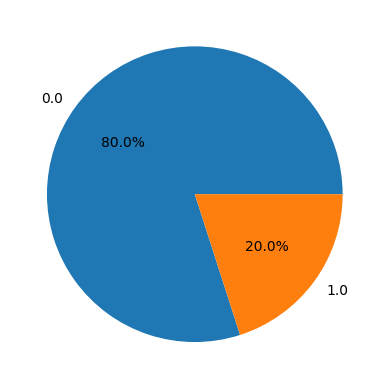

In [16]:
plt.pie(df["churn"].value_counts(),labels=df["churn"].value_counts().index,autopct="%1.1f%%")
plt.show()

In [17]:
df["churn"].value_counts().pipe(lambda x:x/x.sum()*100)

,count
churn,
0.0,79.952208
1.0,20.047792


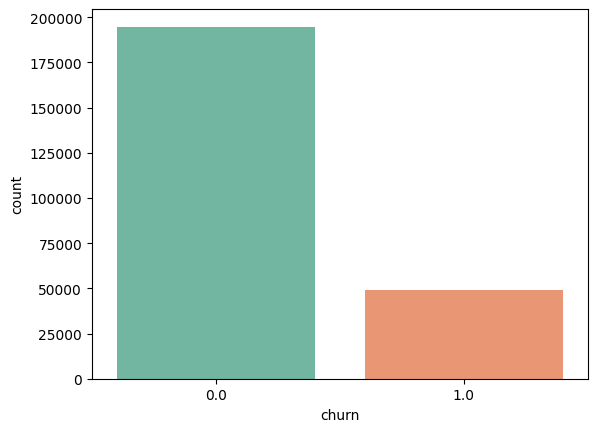

In [18]:
# countpot for churn
sns.countplot(x="churn",data=df,palette="Set2") # imbalanced dataset (churn=0 stayed) and (churn=1 leave)
plt.xlabel("churn")
plt.ylabel("count")

plt.show()

Text(0.5, 0, 'churn')

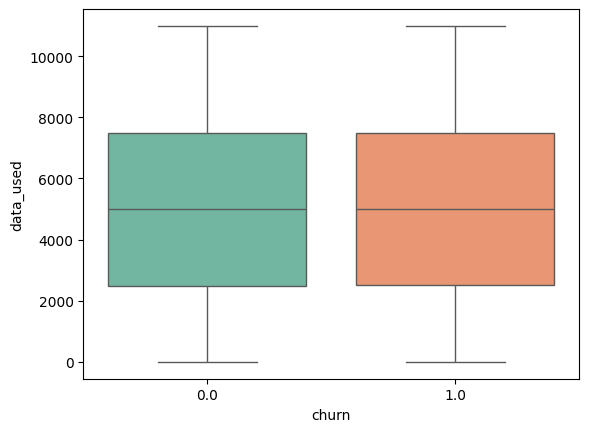

In [19]:
# boxplot show outlier
sns.boxplot(x="churn",y="data_used",data=df,palette="Set2")
plt.xlabel("churn")

In [20]:
df.columns

Index(['telecom_partner', 'gender', 'age', 'state', 'city', 'num_dependents',
       'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'churn',
       'year', 'month', 'day', 'total_data_calls'],
      dtype='object')

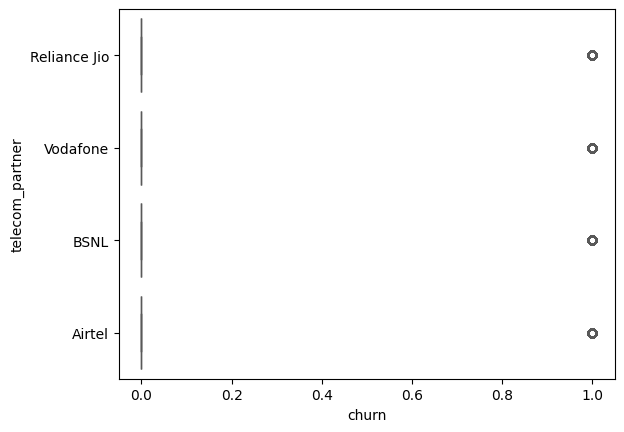

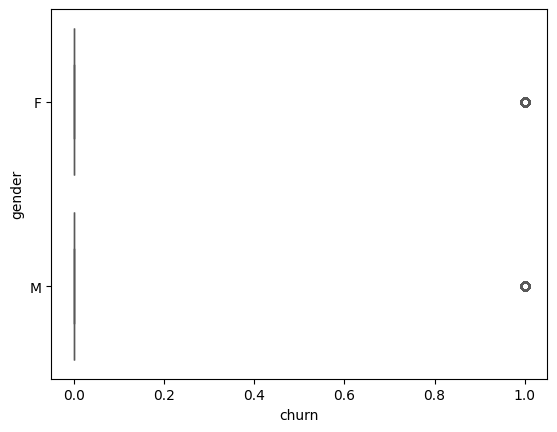

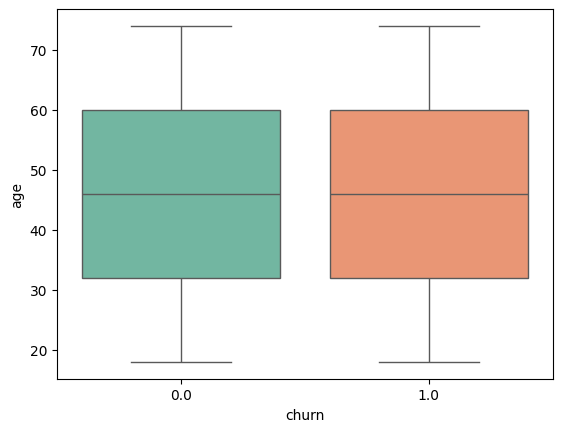

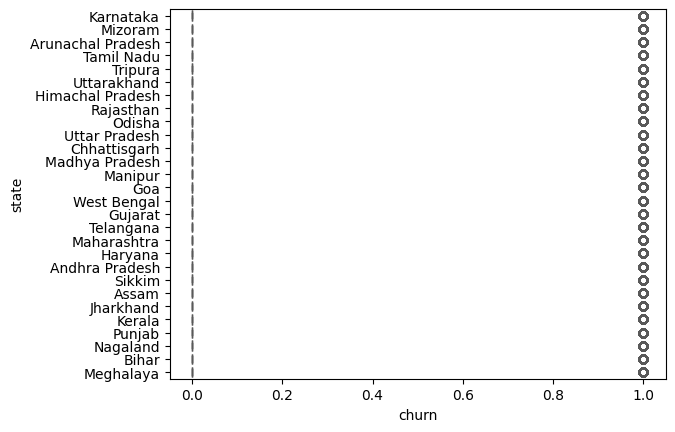

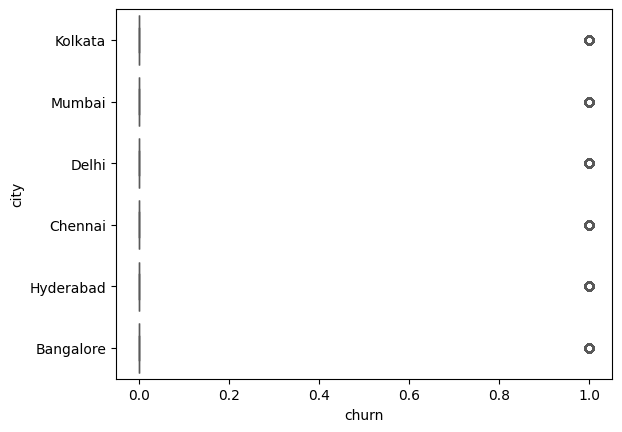

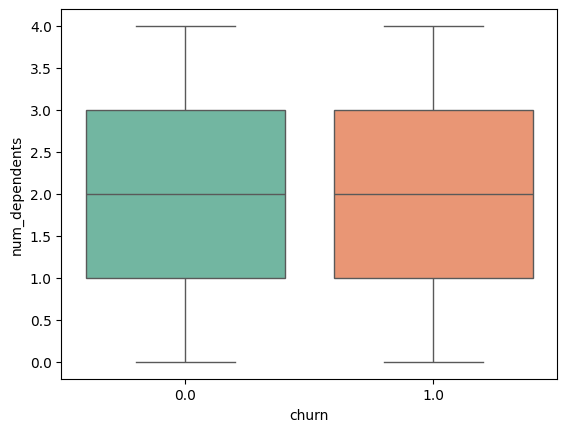

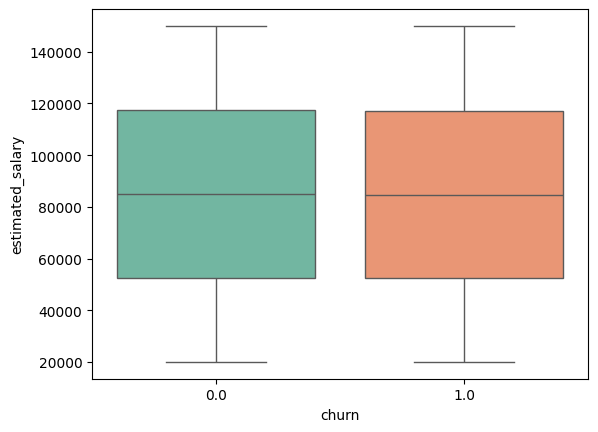

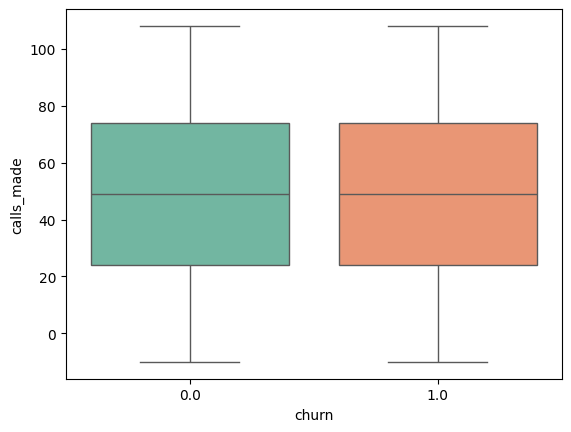

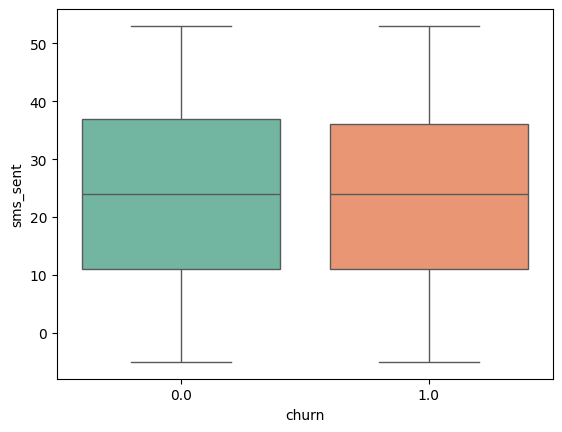

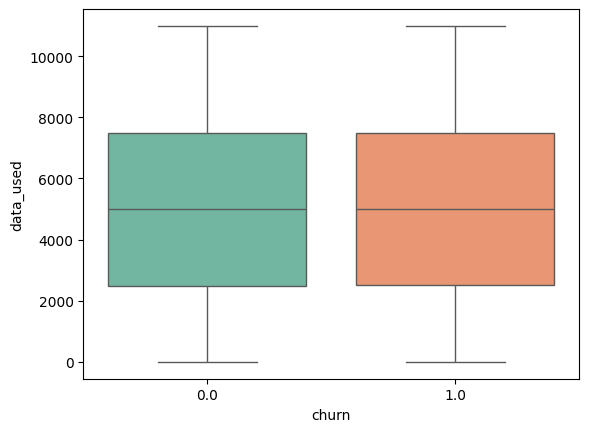

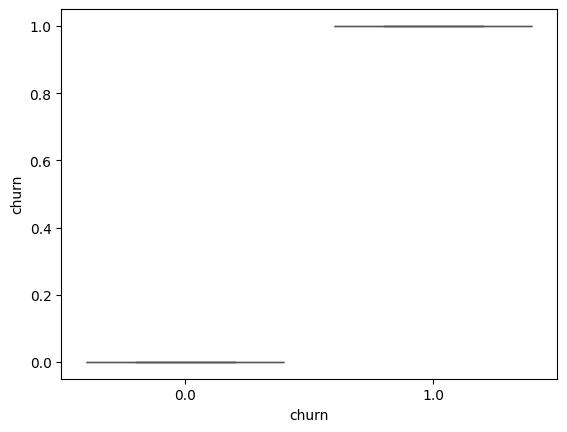

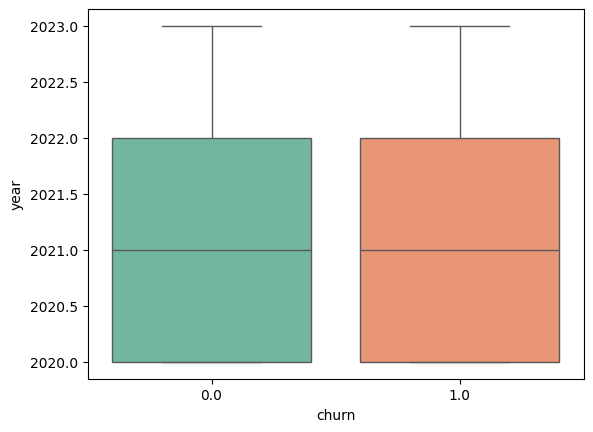

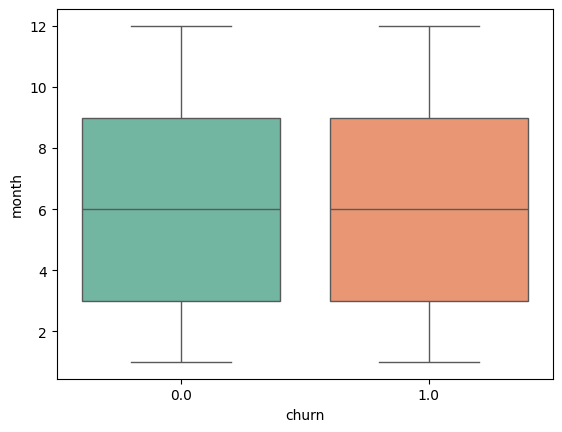

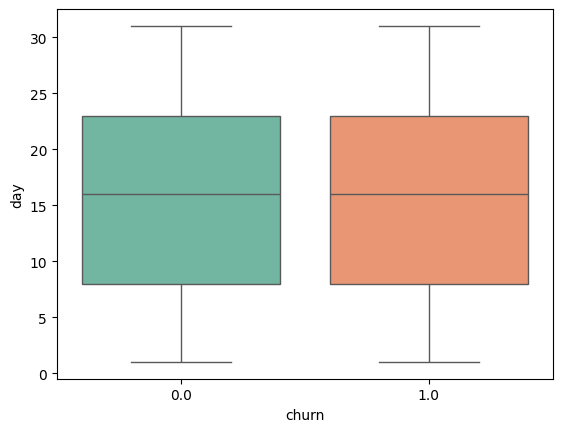

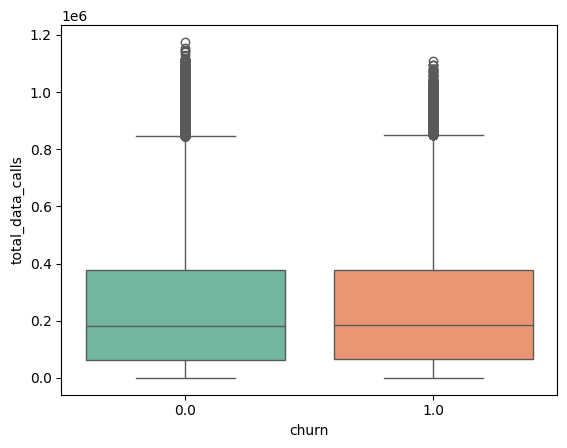

In [21]:
#for loop in boxplot for all data
for i in df:
  sns.boxplot(x="churn",y=i,data=df,palette="Set2")
  plt.xlabel("churn")
  plt.show()


In [22]:
import pandas as pd


# 1. Calculate IQR
Q1 = df['total_data_calls'].quantile(0.25)
Q3 = df['total_data_calls'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# 3. Filter data to remove outliers
df = df[(df['total_data_calls'] >= lower_bound) & (df['total_data_calls'] <= upper_bound)]

# ... (Rest of your code)

Text(0.5, 0, 'churn')

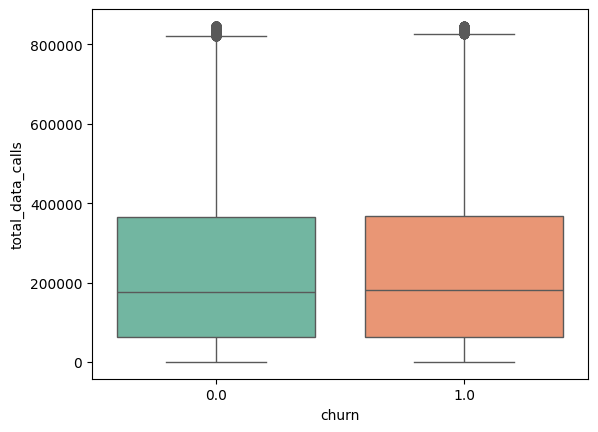

In [23]:
sns.boxplot(x="churn",y="total_data_calls",data=df,palette="Set2")
plt.xlabel("churn")

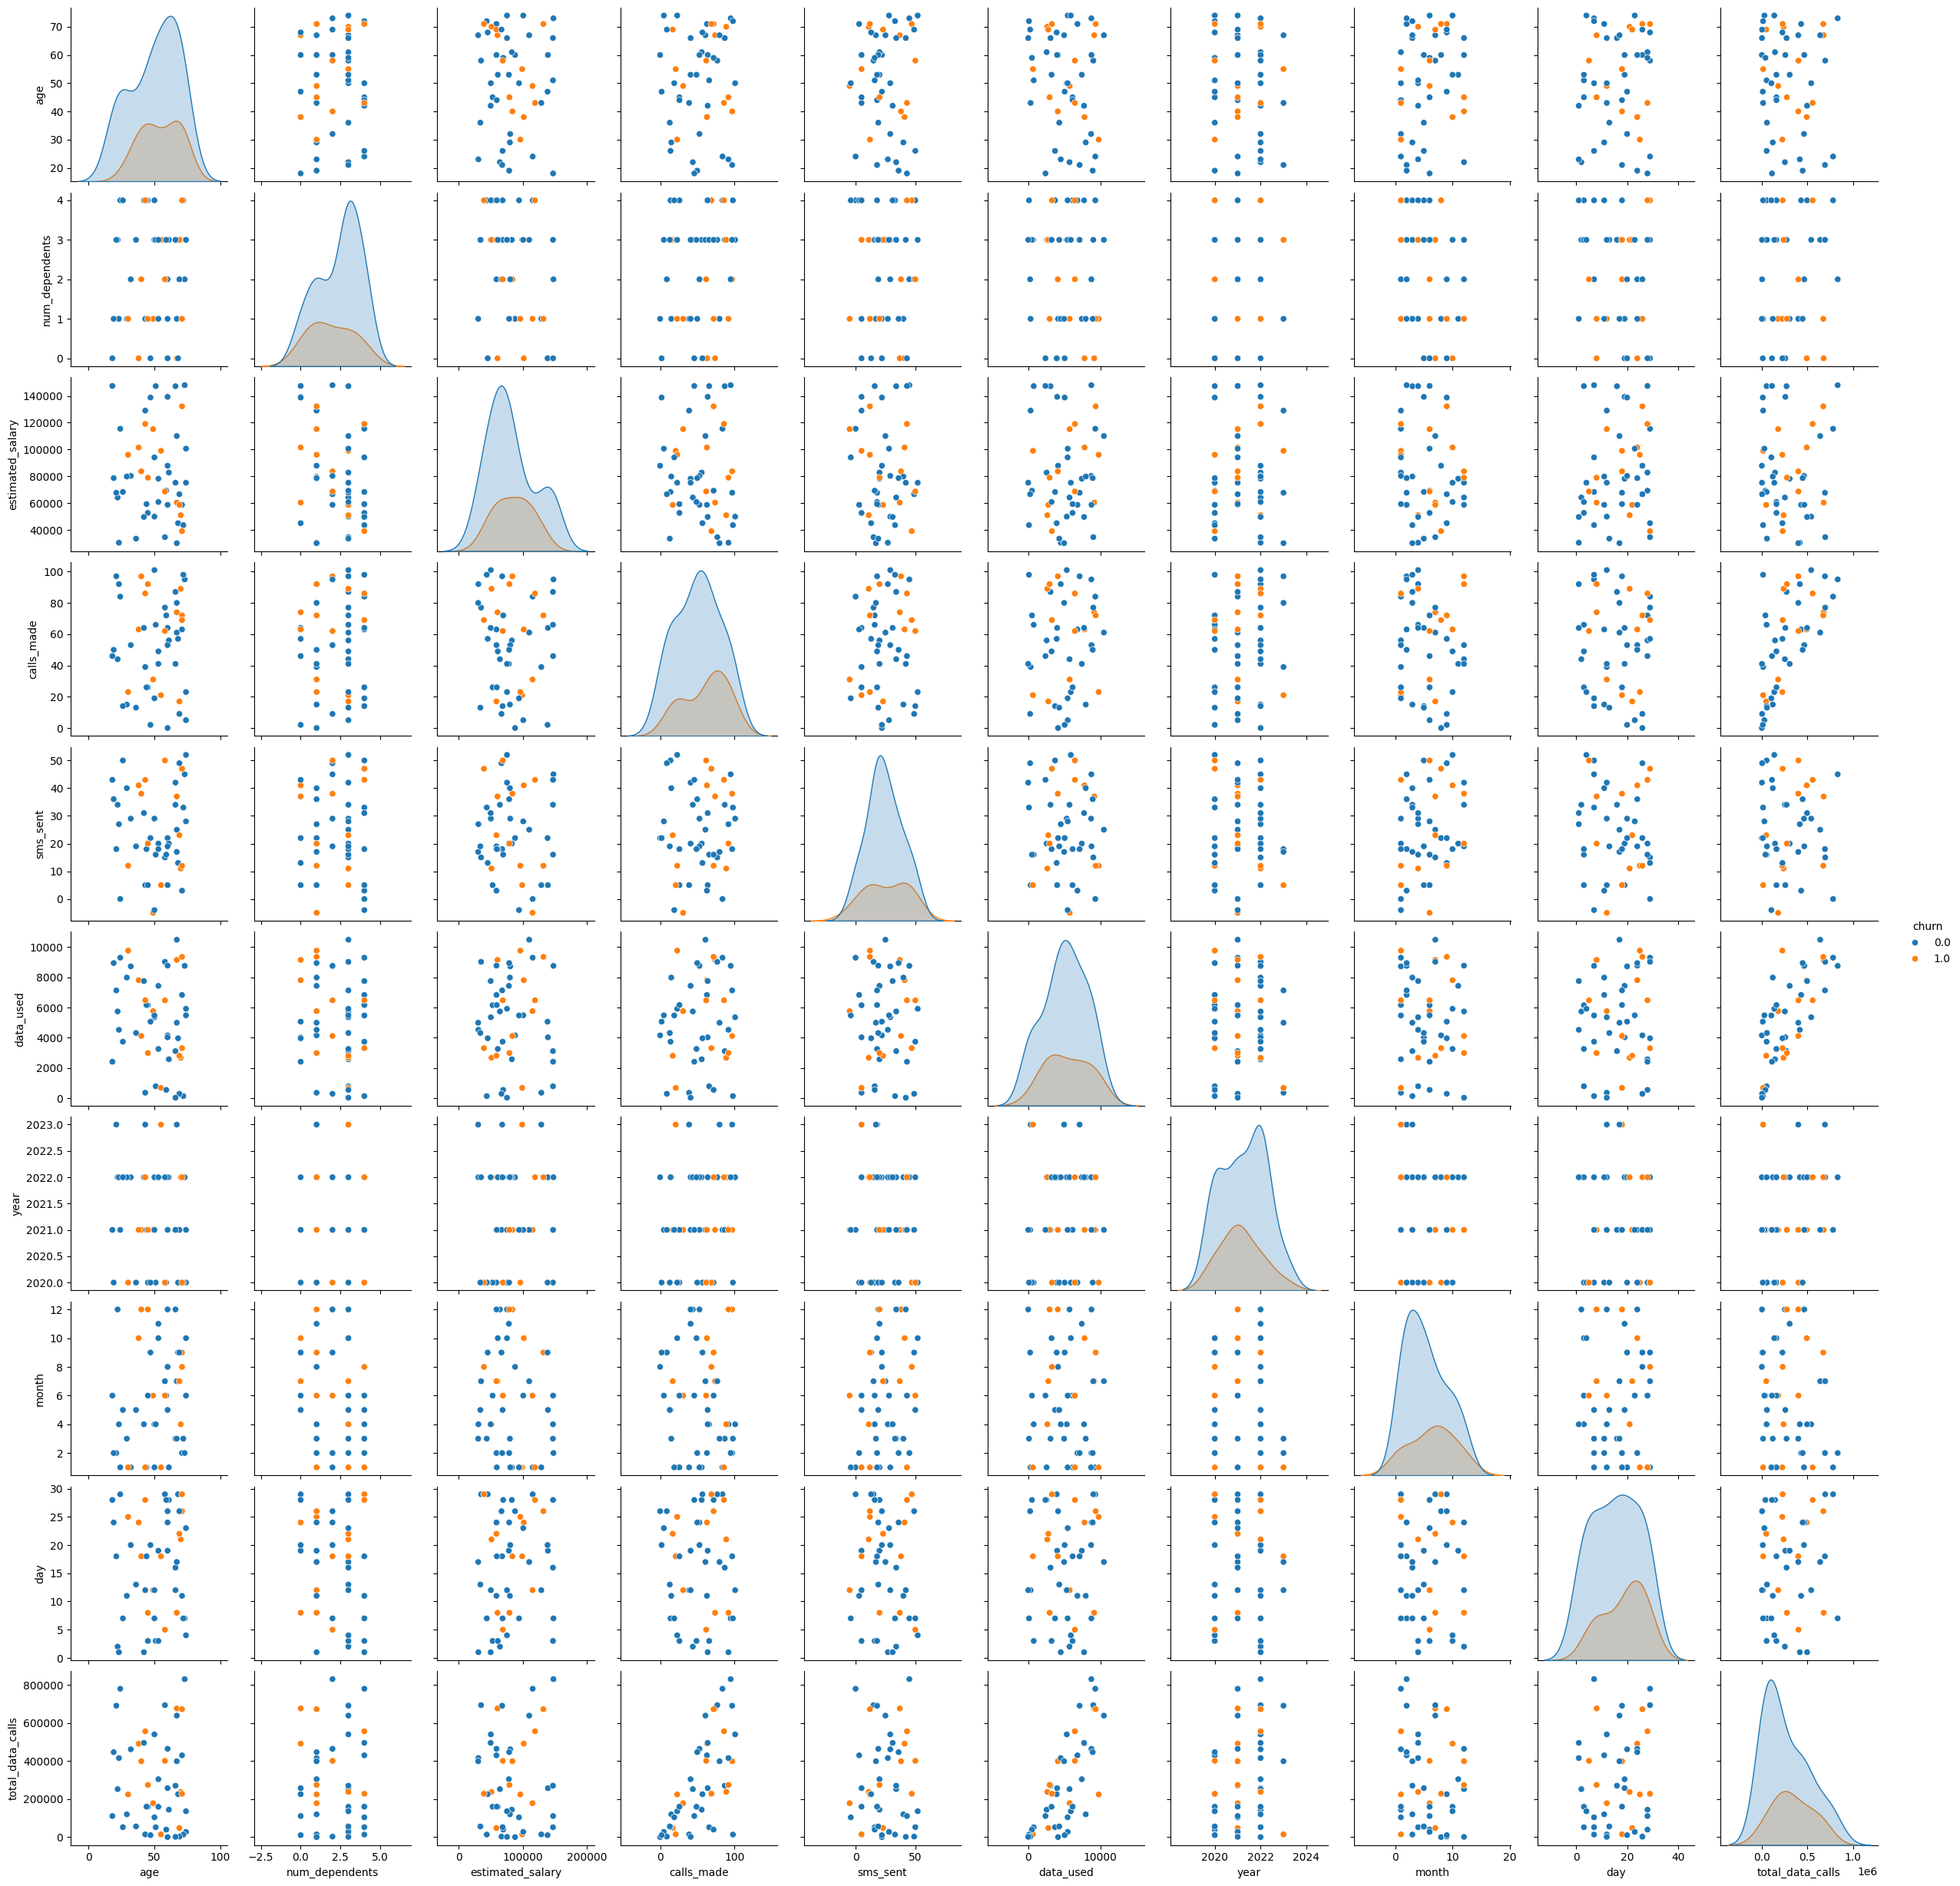

In [24]:
# pariplot slice 100 sample
sns.pairplot(df.sample(50),hue="churn")
plt.show()

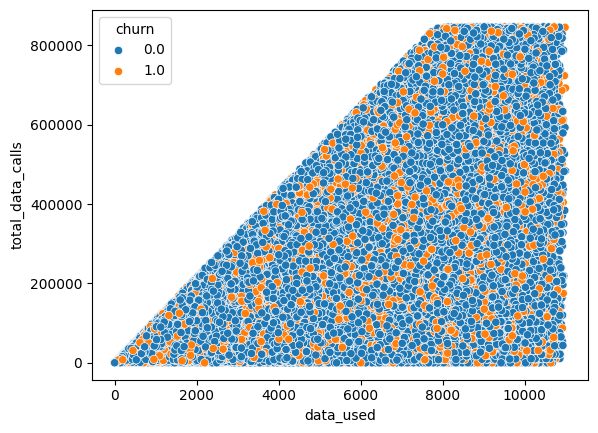

In [25]:
# scatter
sns.scatterplot(x="data_used",y="total_data_calls",data=df,hue="churn")
plt.show()

##4- Feature Engineering:    
class imbalance problem

In [26]:
# feature transformation labeling for categorical data convert to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["telecom_partner"]=le.fit_transform(df["telecom_partner"])
df["gender"]=le.fit_transform(df["gender"])
df["state"]=le.fit_transform(df["state"])
df["city"]=le.fit_transform(df["city"])
df.head()


,telecom_partner,gender,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,year,month,day,total_data_calls
0,2,0,25.0,10,4,4.0,124962.0,44.0,45.0,361.0,0.0,2020,1,1,15884.0
1,2,0,55.0,16,5,2.0,130556.0,62.0,39.0,5973.0,0.0,2020,1,1,370326.0
2,3,0,57.0,1,2,0.0,148828.0,49.0,24.0,193.0,1.0,2020,1,1,9457.0
3,1,1,46.0,22,4,1.0,38722.0,80.0,25.0,9377.0,1.0,2020,1,1,750160.0
4,1,0,26.0,24,2,2.0,55098.0,78.0,15.0,1393.0,0.0,2020,1,1,108654.0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix


In [28]:
#train and test
x= df.drop("churn",axis=1)
y=df["churn"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [29]:
# 3. Address Class Imbalance (Example: SMOTE)
smote = SMOTE(random_state=42)

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [32]:

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced')
}

Model: Logistic Regression
Accuracy: 0.5074
Precision: 0.2053
Recall: 0.5004
F1-Score: 0.2911
[[19517 18816]
 [ 4853  4860]]


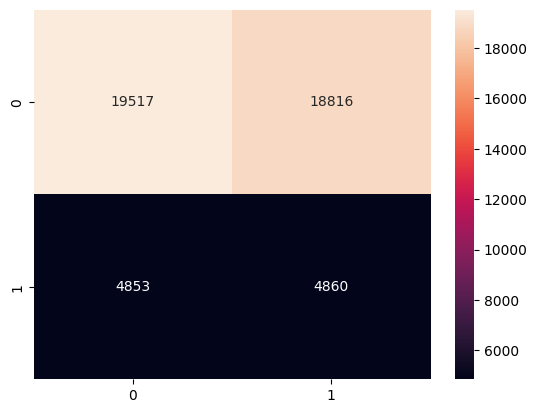

Model: Random Forest
Accuracy: 0.7974
Precision: 0.2308
Recall: 0.0009
F1-Score: 0.0018
[[38303    30]
 [ 9704     9]]


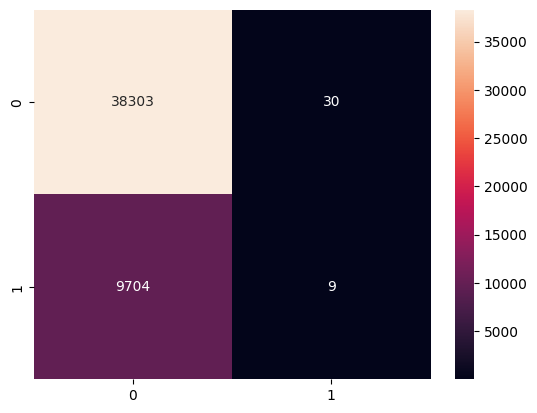

In [33]:
for model_name, model in models.items():
    model.fit(x_train_resampled, y_train_resampled)
    y_pred = model.predict(x_test)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(confusion_matrix(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")
    plt.show()


In [34]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(x_train, y_train)

# y_pred = model.predict(x_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

### save model

In [37]:
import joblib

In [38]:
# Save the model if it's Random Forest
if model_name == 'Random Forest':
        model_filename = "random_forest_model.joblib"
        joblib.dump(model, model_filename)
        print(f"Random Forest model saved to: {model_filename}")

Random Forest model saved to: random_forest_model.joblib


In [39]:
loaded_model = joblib.load("random_forest_model.joblib")

In [41]:
import joblib

model_filename = "random_forest_model.joblib"  # Replace with your actual filename
loaded_model = joblib.load(model_filename)

In [49]:
import pandas as pd
import joblib

# 1. Load the saved model
model_filename = "random_forest_model.joblib"
loaded_model = joblib.load(model_filename)

# 2. Create a DataFrame for new data with all features
new_data = pd.DataFrame({
    'total_data_calls': [1500],  # Replace with actual value
    'telecom_partner': [1],  # Replace with actual encoded value
    'gender': [0],  # Replace with actual encoded value
    'state': [2],  # Replace with actual encoded value
    'city': [10],  # Replace with actual encoded value
    'year': [2023],  # Replace with actual value
    'month': [5],  # Replace with actual value
    'day': [15],  # Replace with actual value
    'data_used': [12],  # Replace with actual value
    'calls_made': [125],  # Replace with actual value
    'average_call_duration': [3.5],  # Replace with actual value
    'monthly_bill': [450],  # Replace with actual value
    'subscription_type': [2],  # Replace with actual encoded value
    'last_payment_method': [1],  # Replace with actual encoded value
    # ... (add other relevant features and their values)
})

# 3. Make prediction
prediction = loaded_model.predict(new_data)
print(prediction)

[0.]


In [53]:
new_data_2 = pd.DataFrame({
    'total_data_calls': [2500],  # Increased data usage
    'telecom_partner': [1],    # Partner associated with higher churn (if known)
    'gender': [1],             # Gender potentially associated with higher churn (if known)
    'state': [5],             # State potentially associated with higher churn (if known)
    'city': [25],              # City potentially associated with higher churn (if known)
    'year': [2023],            # Recent year
    'month': [12],            # End of year
    'day': [31],              # End of month
    'data_used': [15],         # Higher data usage
    'calls_made': [150],       # Higher number of calls
    'average_call_duration': [4.5],  # Longer call duration
    'monthly_bill': [600],      # Higher monthly bill
    'subscription_type': [0],  # Subscription type associated with higher churn (if known)
    'last_payment_method': [2],  # Payment method associated with higher churn (if known)
    # ... (other relevant features and their adjusted values)
})
prediction_2 = loaded_model.predict(new_data_2)
print(prediction_2)

[0.]
